This code is intend to make animation from the plot. By chaning the data this script can be used for making animation for your purpose

# importing libraries
This are the necessary libraries need to run the code

In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook

# loading data

In [2]:
labels = pickle.load(open('original_data.pk', 'rb'))
outputs = pickle.load(open('prediction_data.pk', 'rb'))

# creating functions for animation

In [3]:
# creating empty list to be used for plotting purpose
x = []
y = []
z = []

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return [line1,line2]

def update(i):
    x.append(i + 1)
    y.append(labels[i + 1])
    z.append(outputs[i + 1])
    # logic for moving window
    if len(x)>60:
        del x[0]
        del y[0]
        del z[0]
    if len(x)<60:
        ax.set_xlim(min(x), 60)
    else:
        ax.set_xlim(min(x), max(x))
    line1.set_data(x, y)
    line2.set_data(x, z)
    return [line1,line2]

# making the animation

<IPython.core.display.Javascript object>


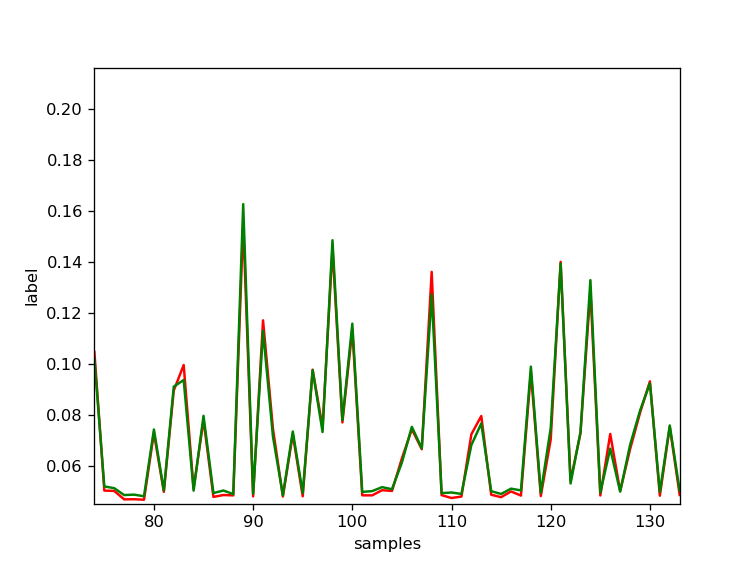

In [4]:
%matplotlib notebook 
# to show the cell output in jupyter notebook

# defining figure
fig, ax = plt.subplots()
ax.set_xlabel('samples')
ax.set_ylabel('label')
ax.set_ylim(min(labels), max(labels))
line1, = ax.plot(x, y, color = "r")
line2, = ax.plot(x, z, color = "g")



# making the animation
ani = animation.FuncAnimation(fig, update, init_func=init,
                               frames=200, interval=20, blit=True, repeat = True)
# saving part
ani.save('result.gif', writer=PillowWriter(fps=20)) # saving as gif
# plt.show()

In [ ]:
<img src="result.gif" width="750" align="center"> 
<img src="FileName.gif" width="750" align="center">

# Converting GIF to MP4
Saving as MP4 is little bit tricky as we need to use ffmeg. So, we can just convert GIF to MP4.

In [5]:
# Converting GIF to MP4
import moviepy.editor as mp
clip = mp.VideoFileClip("result.gif")
clip.write_videofile("result_converted_from_gif.mp4")

Moviepy - Building video result_converted_from_gif.mp4.
Moviepy - Writing video result_converted_from_gif.mp4



Moviepy - Done !
Moviepy - video ready result_converted_from_gif.mp4


# Other ways for saving as MP4
Download the static ffmpeg from the following links
https://ffmpeg.zeranoe.com/builds/
Then, unzip it and define the animation.ffmpeg_path as the location of ffmpeg.exe. After that, you can write it as mp4.

In [6]:
plt.rcParams['animation.ffmpeg_path'] = r"ffmpeg_static\bin\ffmpeg.exe"
# writer = animation.FFMpegFileWriter(fps=60) 
# writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Tanmoy'), bitrate=1800)
ani.save('result.mp4', writer=writer)

# References
- https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1    
- https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
- https://stackoverflow.com/questions/49165233/two-lines-matplotib-animation
- http://www.roboticslab.ca/wp-content/uploads/2012/11/robotics_lab_animation_example.txt
- https://anaconda.org/menpo/ffmpeg
- http://blog.gregzaal.com/how-to-install-ffmpeg-on-windows/
- https://ffmpeg.zeranoe.com/builds/